In [2]:
import pickle

with open('ty_dataframes.pkl', 'rb') as file:
    data = pickle.load(file)

ty_full = data['ty_full']
ty_dropped = data['ty_dropped']

# Filling up null values in full dataframe 

In [3]:
ty_full_filled = ty_full.fillna(0)

In [71]:
ty_full_filled['Target'].value_counts()

Other               1239
Outlier/Longtail     163
Name: Target, dtype: int64

# Training on full dataset

In [18]:
from sklearn.model_selection import train_test_split

columns_to_drop = ['Target', 'Name', 'Distribution Type', 'Target_Encoded']
X = ty_full_filled.drop(columns = columns_to_drop)
y = ty_full_filled['Target_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight={0: 1, 1: 10})

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [76]:
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9857651245551602
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       257
           1       0.95      0.88      0.91        24

    accuracy                           0.99       281
   macro avg       0.97      0.94      0.95       281
weighted avg       0.99      0.99      0.99       281



In [25]:
# for positive class (outlier/longtail)
unrecalled_mask = (y_test == 1) & (y_pred != 1)
unrecalled_points = X_test[unrecalled_mask]

recalled_mask = (y_test == 1) & (y_pred == 1)
recalled_points = X_test[recalled_mask]

# for negative class (other distributions)
negative_mask = (y_test == 0) & (y_pred == 0)
negative_points = X_test[negative_mask]

In [26]:
ty_full_filled.iloc[unrecalled_points.index]

,Name,Target,Target_Encoded,Distribution Type,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,...,Tail_Weight_Ratio,Excess_Kurtosis,P99,P1,Outliers_Zscore,Outliers_IQR,KS_Stat_norm,KS_P_value_norm,Shapiro_Stat,Shapiro_P_value
29,a_openXv_SIG_x_x_500uA__VDDNV,Outlier/Longtail,1,outlier,-1.117207e-12,0.011715,1.000006,0.721904,33.198213,1369.68147,...,0.002519,1366.68147,0.766636,-0.927492,40,0,0.216918,0.0,0.254136,7.406007e-168
30,a_shortXv_SIG_x_x_500uA__VDDNV,Outlier/Longtail,1,outlier,-1.117207e-12,0.011715,1.000006,0.721904,33.198213,1369.68147,...,0.002519,1366.68147,0.766636,-0.927492,40,0,0.216918,0.0,0.254136,7.406007e-168
310,p_nvm_measureXxXPatarrayleakevenM0YvhsYvhsYyYY...,Outlier/Longtail,1,outlier,5.887441e-18,-0.016995,1.000006,0.000000,0.000000,0.00000,...,0.000289,-3.00000,-0.016995,-0.016995,23,79654,0.506491,0.0,0.003952,1.202701e-177


In [65]:
unrecalled_points.describe()

,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,Min,Max,Range,Upper_Tail,...,Tail_Weight_Ratio,Excess_Kurtosis,P99,P1,Outliers_Zscore,Outliers_IQR,KS_Stat_norm,KS_P_value_norm,Shapiro_Stat,Shapiro_P_value
count,3.000000e+00,3.000000,3.000000e+00,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.0,3.000000,3.000000e+00
mean,1.439604e-13,-0.018384,1.000006e+00,0.085923,58.605086,9094.528465,-19.530782,83.256787,102.787569,0.020481,...,0.001205,9091.528465,0.087630,-0.122912,58.333333,79654.0,0.462241,0.0,0.030145,3.589890e-175
std,2.493438e-13,0.013217,2.282190e-13,0.148824,90.582904,15118.201149,33.808598,71.013634,53.585998,0.035475,...,0.001566,15118.201149,0.171570,0.193251,79.952069,0.0,0.073018,0.0,0.048361,0.000000e+00
min,1.159647e-18,-0.032395,1.000006e+00,0.000000,0.000000,0.000000,-58.569588,26.664217,60.180035,0.000000,...,0.000276,-3.000000,-0.016621,-0.345977,3.000000,79654.0,0.377958,0.0,0.000672,9.263140e-178
25%,1.650267e-18,-0.024508,1.000006e+00,0.000000,6.439333,368.626012,-29.293105,43.413816,72.706920,0.000000,...,0.000301,365.626012,-0.011379,-0.181299,12.500000,79654.0,0.440184,0.0,0.002238,1.057435e-177
50%,2.140888e-18,-0.016621,1.000006e+00,0.000000,12.878666,737.252024,-0.016621,60.163414,85.233805,0.000000,...,0.000326,734.252024,-0.006137,-0.016621,22.000000,79654.0,0.502411,0.0,0.003803,1.188556e-177
75%,2.159400e-13,-0.011379,1.000006e+00,0.128885,87.907629,13641.792698,-0.011379,111.553072,124.091336,0.030722,...,0.001670,13638.792698,0.139756,-0.011379,86.000000,79654.0,0.504383,0.0,0.044881,5.380203e-175
max,4.318779e-13,-0.006137,1.000006e+00,0.257770,162.936593,26546.333371,-0.006137,162.942730,162.948867,0.061444,...,0.003013,26543.333371,0.285650,-0.006137,150.000000,79654.0,0.506354,0.0,0.085958,1.074852e-174


In [ ]:
import pandas as pd
import matplotlib as plt

importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

# Balancing dataset
Recall for positive class improved to 100% 

In [57]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model_smote = RandomForestClassifier() #class_weight={0: 1, 1: 10}
model_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = model_smote.predict(X_test)

In [58]:
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_smote))

Accuracy: 0.9715302491103203
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       257
           1       0.75      1.00      0.86        24

    accuracy                           0.97       281
   macro avg       0.88      0.98      0.92       281
weighted avg       0.98      0.97      0.97       281



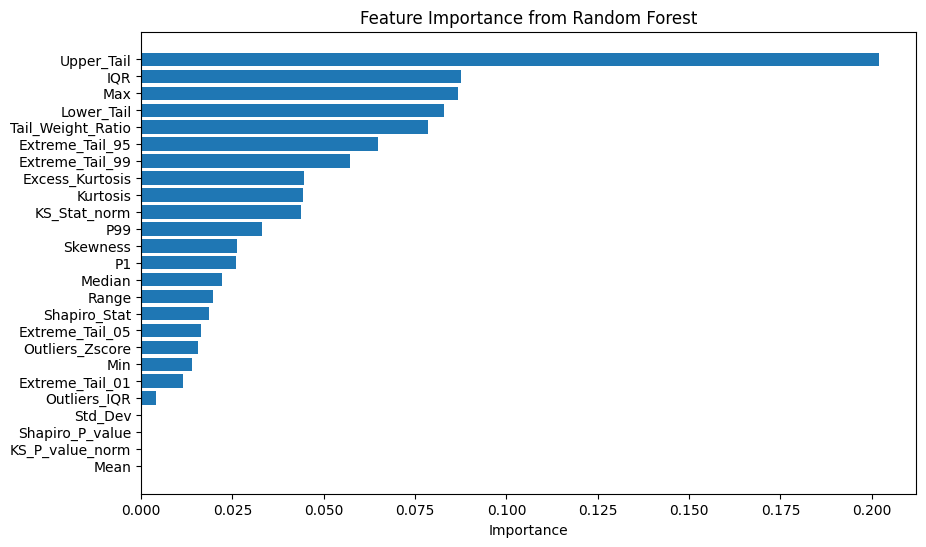

In [59]:
import pandas as pd
import matplotlib as plt

importances_smote = model_smote.feature_importances_

importance_df_smote = pd.DataFrame({
    'Feature': X_train_smote.columns,
    'Importance': importances_smote
}).sort_values(by='Importance', ascending=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df_smote['Feature'], importance_df_smote['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

# Predicting on YK data using this model

In [65]:
import pickle

with open('yk_dataframes.pkl', 'rb') as file:
    data = pickle.load(file)

yk_full = data['yk_full']
yk_dropped = data['yk_dropped']

In [66]:
yk_full_filled = yk_full.fillna(0)

In [70]:
columns_to_drop = ['Target', 'Name', 'Distribution Type', 'Target_Encoded']
X_yk = yk_full_filled.drop(columns = columns_to_drop)
y_yk = yk_full_filled['Target_Encoded']

In [91]:
y_pred_yk = model_smote.predict(X_yk)

In [92]:
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_yk, y_pred_yk))
print("Classification Report:\n", classification_report(y_yk, y_pred_yk))

Accuracy: 0.5209756097560976
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.99      0.66       490
           1       0.94      0.09      0.16       535

    accuracy                           0.52      1025
   macro avg       0.72      0.54      0.41      1025
weighted avg       0.73      0.52      0.40      1025



# Feature crossing and dropping

In [37]:
def feature_crossing(train, test):
    dfs = [train.copy(), test.copy()]
    for df in dfs:
        df['skewness_kurtosis'] = df['Skewness'] * df['Kurtosis']
        df['skewness_range'] = df['Skewness'] * df['Range']
        df['kurtosis_range'] = df['Kurtosis'] * df['Range']
        df['iqr_skewness'] = df['IQR'] * df['Skewness']
        df['mean_kurtosis'] = df['Mean'] * df['Kurtosis']
        #df['std_dev_per_ratio']= df['Std_Dev'] * df['Percentile_Ratio_95_5']
    return dfs

In [38]:
result = feature_crossing(X_train_smote, X_test)
X_train_crossed = result[0]
X_test_crossed = result[1]

In [40]:
from sklearn.ensemble import RandomForestClassifier

model_crossed = RandomForestClassifier()

model_crossed.fit(X_train_crossed, y_train_smote)

y_pred_crossed = model_crossed.predict(X_test_crossed)

In [41]:
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_crossed))
print("Classification Report:\n", classification_report(y_test, y_pred_crossed))

Accuracy: 0.9679715302491103
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       257
           1       0.76      0.92      0.83        24

    accuracy                           0.97       281
   macro avg       0.88      0.94      0.91       281
weighted avg       0.97      0.97      0.97       281



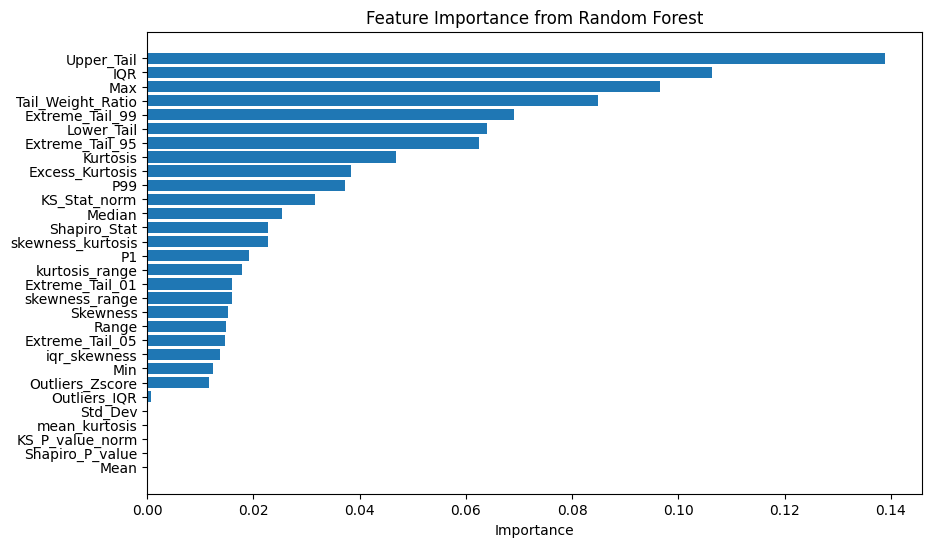

In [42]:
import pandas as pd
import matplotlib as plt

importances_crossed = model_crossed.feature_importances_

importance_df_crossed = pd.DataFrame({
    'Feature': X_train_crossed.columns,
    'Importance': importances_crossed
}).sort_values(by='Importance', ascending=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df_crossed['Feature'], importance_df_crossed['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

In [43]:
# least importance features
to_drop = list(importance_df_crossed.sort_values(by='Importance', ascending=True)[:5]['Feature'])
to_drop

['Mean', 'Shapiro_P_value', 'KS_P_value_norm', 'mean_kurtosis', 'Std_Dev']

In [44]:
def feature_dropping(train, test, variables: list):
    train_dropped = train.drop(variables, axis=1)
    test_dropped = test.drop(variables, axis=1)
    return train_dropped, test_dropped

In [45]:
dropped = feature_dropping(X_train_crossed, X_test_crossed, to_drop)

X_train2 = dropped[0]
X_test2 = dropped[1]

In [47]:
from sklearn.ensemble import RandomForestClassifier

model_final = RandomForestClassifier()

model_final.fit(X_train2, y_train_smote)

y_pred_final = model_final.predict(X_test2)

In [48]:
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("Classification Report:\n", classification_report(y_test, y_pred_final))

Accuracy: 0.9644128113879004
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       257
           1       0.73      0.92      0.81        24

    accuracy                           0.96       281
   macro avg       0.86      0.94      0.90       281
weighted avg       0.97      0.96      0.97       281



# Training on dropped data

In [17]:
from sklearn.model_selection import train_test_split

columns_to_drop = ['Target', 'Name', 'Distribution Type', 'Target_Encoded']
X = ty_dropped.drop(columns = columns_to_drop)
y = ty_dropped['Target_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [19]:
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9605263157894737
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       197
           1       0.82      0.90      0.86        31

    accuracy                           0.96       228
   macro avg       0.90      0.94      0.92       228
weighted avg       0.96      0.96      0.96       228



# Using model trained on YK data to predict distributions of TY data

In [86]:
with open('yk_model.pkl', 'rb') as file:
    yk_model = pickle.load(file)

In [89]:
columns_to_drop = ['Target', 'Name', 'Distribution Type', 'Target_Encoded']

X_ty = ty_full_filled.drop(columns = columns_to_drop)
y_ty = ty_full_filled['Target_Encoded']

In [90]:
yk_pred = yk_model.predict(X_ty)

print("Accuracy:", accuracy_score(y_ty, yk_pred))
print("Classification Report:\n", classification_report(y_ty, yk_pred))

Accuracy: 0.5998573466476462
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.57      0.72      1239
           1       0.20      0.79      0.32       163

    accuracy                           0.60      1402
   macro avg       0.58      0.68      0.52      1402
weighted avg       0.87      0.60      0.67      1402

